# ------------    distribution plots    ------------
#### Let's go over some plots that help visualize the distribution of a dataset
        #   distplot
        #   jointplot
        #   pairplot
        #   rugplot
        #   kdeplot

In [1]:
# import libraries
import seaborn as sns
# shows figures in ipynb
%matplotlib inline

In [2]:
# lets load a builtin dataset of seaborn. tips: a dataset of restaurant patrons' tipping behavior
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

___

## ------------    distplot    ------------
    # it shows the distribution of uni-variate (one-variable) set of observations

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

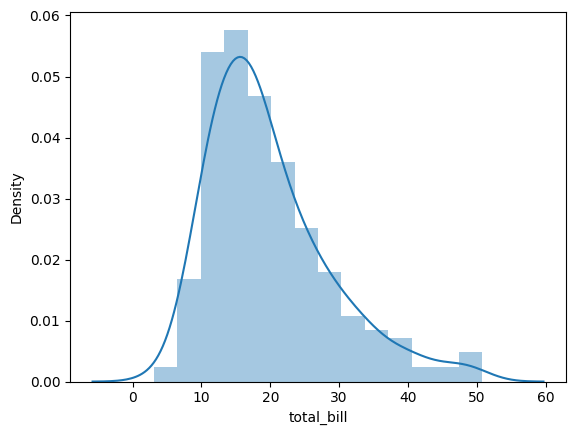

In [5]:
# use a single column of your datsset
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='tip'>

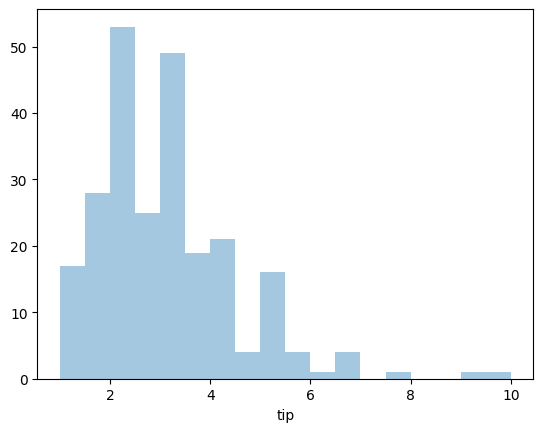

In [6]:
# Notice we have a "kde (kernel density estimation) layer" (the blue line)
# to remove it, we just use "kde=False"
sns.distplot(tips['tip'], kde=False)
# now we just have a "histogram" is just a distribution of the data-points
# Y-axis is the "counts" and X-axis is the "data"
# so $2 nad $3 are most given tips

<AxesSubplot:xlabel='total_bill'>

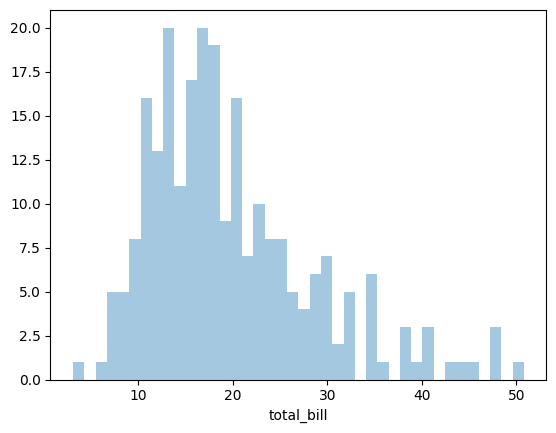

In [4]:
# change noumber of bins (depends on dataset)
# bins too high plots every single instance, make your plot wierd
sns.distplot(tips['total_bill'], kde=False, bins=40)
# most of the bills happens in between 10 and 20 dollers

# ------------    jointplot    ------------
    # jointplot() creates a combined view of two distributions for bivariate data, 
    # allowing you to select a comparison type with the kind parameter:
    #   "scatter" -  scatter plot
    #   "reg"     -  regression plot
    #   "resid"   -  residuals plot
    #   "kde"     -  kernel density plot
    #   "hex"     -  hexbin plot

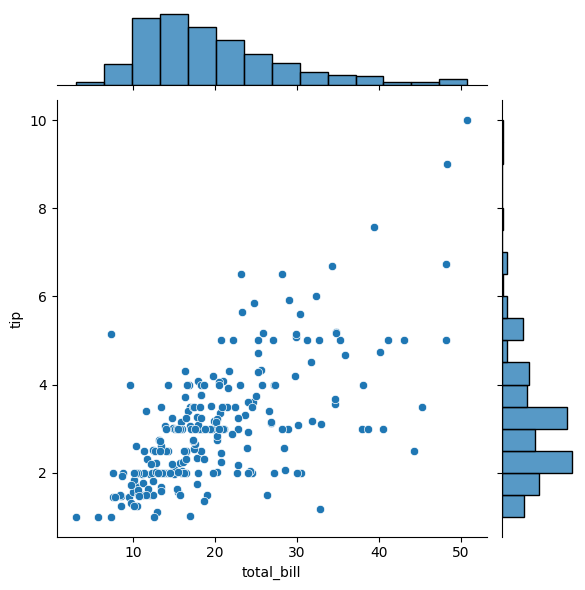

In [3]:
# for example we can show dstribution of both total_bill and tip
# also we can plot their relation on a scatterplot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')